# Transition from MATLAB to Python Controls Package

This notebook is a guide to installing the controls package for python and getting started with basic commands and functions in the controls toolbox.  

## 1 - Installing Required Packages

Jupyter notebook comes with important packages already installed. The user does not need to install NumPy, SciPy, or Matplotlib. For full functionality of the controls package, the **slycot** (Subroutine Library in Systems and Control Theory) package needs to be installed as a lot of functions defined in the controls package depend on slycot.

The controls and slycot packages can be installed using many methods. The two easiest methods are 

    1.1 - Using pip  
    1.2 - Using conda terminal (recommended for slycot)

### 1.1 - Pip

The controls package can be installed with a single line in a notebook code cell or Jupyter terminal (Jupyter notebook homepage > New > Terminal). Type and run the command 
> pip install control

**Note**: This method might not work for slycot because it requires many dependencies/compilers to be installed on the local machine. 

### 1.2 - Conda Terminal

In the Anaconda app, go to environments and click the arrow next to your desired environment ( **base (root)** if you do not have any virtual environments) and click "open terminal". Once the terminal is opened, type and run the command 
> conda install -c conda-forge control slycot

Type and enter "y" in the command prompt for slycot installation.



## 2 - Using the Controls Toolbox

The full documentation and guide can be found at [this link]( https://python-control.readthedocs.io/en/0.8.4/) (see Funtion reference bracket). Unlike MATLAB, the required directories/packages need to be imported in Python. The most common packages are numpy, scipy, matplotlib, and control. The controls package has a sub-directory for easy transition from MATLAB using the package **control.matlab**. The guide for this can be found at the link mentioned above. 

In [3]:
%matplotlib notebook 
#For interactive plots. This command creates plot that can be moved and shows x,y values when cursor is hovered on the plot. It can also be used for animations. %matplotlib inline just plots a pic of the graph.

import numpy as np
import scipy as sc
import control as co
import matplotlib.pyplot as plt

import warnings #Hide warning regarding imaginary plots - NOT RECOMMENDED for normal use
warnings.filterwarnings('ignore')

**Points to Remember**

- The array indexing in Python starts from **0** as opposed to 1 in MATLAB
- Array elements are accessed using square brackets ***[]*** as opposed to parentheses **()**
- Array elements need to be separated by a comma. E.g. array = np.array([1,2,3])
- Matrices are nested arrays and the first element in a 2-D Array would be an array itself. E.g: matrix = np.array([[1,2],[3,4]])
- While using a function defined in an imported package, use the package name or the assigned variable when calling the function. E.g: numpy.array or np.array, control.ss or co.ss as defined

### 2.1 System Creation 

To create a system, the functions **ss** and **tf** can be used to create a state space or a transfer function system, respectively. An example is illustrated below.
> **ss(A,B,C,D)** - Create a state space system  
> **tf(num,den)** - Create a transfer function system

In [4]:
#Creating a transfer function system

num = [1,2] # Numerator co-efficients
den = [1,2,3] # Denominator co-efficients

sys_tf = co.tf(num,den)
print(sys_tf)


    s + 2
-------------
s^2 + 2 s + 3



In [5]:
#Creating a state space system 

# Type system Matrices
A = np.array([[0,1],[-3,-2]])
B = np.array([[0],[1]])
C = np.array([2,1])
D = np.array([0])

sys_ss = co.ss(A,B,C,D)
print(sys_ss)

A = [[ 0.  1.]
     [-3. -2.]]

B = [[0.]
     [1.]]

C = [[2. 1.]]

D = [[0.]]



### 2.2 System Conversion 

This section shows how to convert system from one type to another, i.e., from state-space to transfer function and vice-versa. Similar to MATLAB, the commands used are 
> **tf2ss(sys)** - Convert Transfer function to state-space  
> **ss2tf(sys)** - Convert state-space to transfer function

In [6]:
# Transfer funtion to state space conversion of the above system
sys_ss2 = co.tf2ss(sys_tf)
print(sys_ss2)

A = [[-2.00000000e+00  3.00000000e+00]
     [-1.00000000e+00 -1.11022302e-16]]

B = [[1.]
     [0.]]

C = [[ 1. -2.]]

D = [[0.]]



In [7]:
sys_tf2 = co.ss2tf(sys_ss)
print(sys_tf2)


    s + 2
-------------
s^2 + 2 s + 3



Note that the system in *In [10]* is similar to the output of *In [12]*. In [10] uses Controllable Canonical Form (CCF) of the system.

### 2.3 System Responses

This section covers generation of some system responses to desired inputs, namely:
- Step Response  
- Forced Response  
- Initial Response  
- Impulse Response

#### 2.3.1 Step Response

Generates system response to step input. Step response generation is very similar to that in MATLAB, with the only difference being figure creation. MATLAB automatically plots the data. In Python, the data is stored in variables which are then plotted using the plot() function. The syntax is:
> T, yout = step_response(sys [, T, X0]) - parametes in [] are optional

See the example below. 

<IPython.core.display.Javascript object>


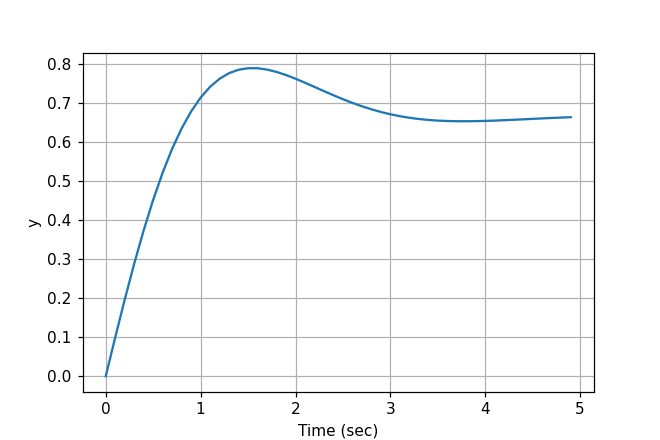

Text(0.5, 0, 'Time (sec)')

In [8]:
t0 = 0 # Initial Time 
tf = 5 # Final Time
dt = 0.1 # Time step

T = np.arange(t0,tf,dt) #Create Time array. This step is not necessary. step function automatically generates time vector. see line 8

T,yout = co.step_response(sys_ss,T)
# T, yout = co.step_response(sys_ss) # Use this command without a time vector

# Plot the response
plt.figure(1,figsize = (6,4))
plt.plot(T,yout)

plt.grid(True)
plt.ylabel("y")
plt.xlabel("Time (sec)")

#### 2.3.2 Forced Response

This function is used to generate the response of a linear system to a given input U (U = 0 by default). This is similar to lsim() in MATLAB. The syntax is 
> T, yout, xout = forced_response(sys[, T, U, X0,]) - parameters in [] are optional

See example below

<IPython.core.display.Javascript object>


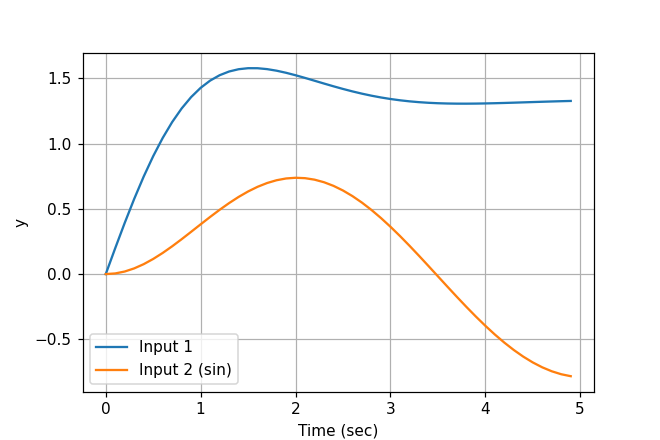

In [9]:
u1 = np.full((1,len(T)),2) #Create an array of 2's, equal to 2*step
u2 = np.sin(T) 

T,yout_u1,xout_u1 = co.forced_response(sys_ss,T,u1) # Response to input 1
T,yout_u2,xout_u2 = co.forced_response(sys_ss,T,u2) # Response to input 2

plt.figure(2,figsize = (6,4))

plt.plot(T,yout_u1)
plt.plot(T,yout_u2)

plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("y")
plt.legend(["Input 1","Input 2 (sin)"])

#### 2.3.3 Impulse Response

This function generates the system response to an impulse. It is similar to the impulse() function in MATLAB. The syntax is
> T, yout = impulse_response(sys[, T, X0, input, …])

See the example below

<IPython.core.display.Javascript object>


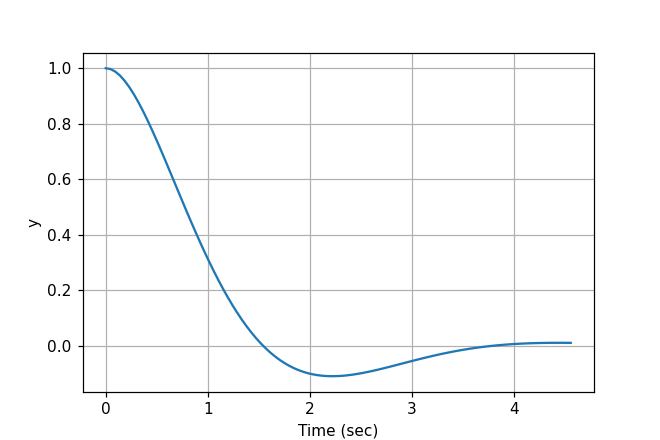

Text(0, 0.5, 'y')

In [10]:
T, yout_imp = co.impulse_response(sys_ss) #Generate Impulse Response

plt.figure(3,figsize = (6,4)) # Create new figure and plot
plt.plot(T,yout_imp)

plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("y")

#### 2.3.4 Response to Initial Conditions

The function generates system response to a given initial condition. This is similar to initial() function in MATLAB. The syntax is 
> T, yout = initial_response(sys[, T, X0, input, …])

It is required to specify the initial condition in an X0 vector. Otherwise, it is assumed to be zero.

See example below

<IPython.core.display.Javascript object>


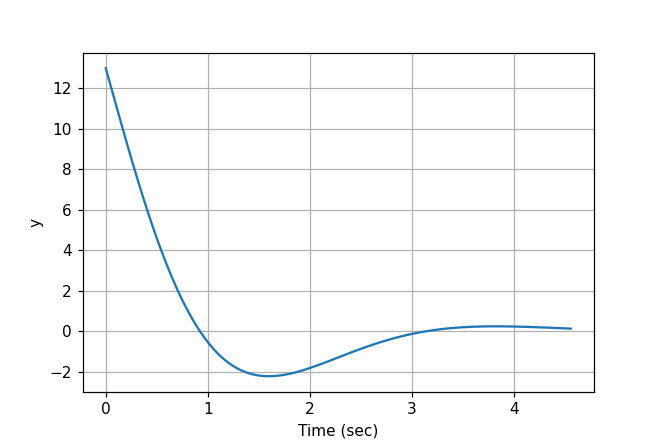

Text(0, 0.5, 'y')

In [19]:
X0 = [[6],[1]]
T, yout_init = co.initial_response(sys_ss,X0 = X0) # Generate initial Response and X0 is a parameter defined in function call assigned to the X0 vector created

plt.figure(4,figsize = (6,4)) # Create new figure and plot
plt.plot(T,yout_init)

plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("y")

### 2.4 Control System Analysis

The following functions help with obtaining important analysis data that are used frequently. This data helps in predicting the system behavior and showcase important system characteristics such as poles, zeros, dcgain, root_locus, etc. Only some basic functions are included in this guide. The full list can be found in the link under section 2. 

**Analysis Functions**

| Syntax                       | Description                                                          |
| :------                      | :--------------------------------                                    |
| k = dcgain(sys)              | Return the zero-frequency (or DC) gain of the given system           | 
| gm, pm, wg, wp = margin(sys) | Calculate gain and phase margins and associated crossover frequencies|
| poles = pole(sys)            | Compute system poles                                                 |
| zeros = zero(sys)            | Compute system zeros                                                 |
| pzmap(sys)                   | Plot a pole-zero map                                                 |
| root_locus(sys)              | Root-locus plot                                                      |

See examples of the functions below

In [13]:
# DC Gain
k = co.dcgain(sys_ss)
print('DC gain = ', k)

# Margins
gm, pm, wg, wp = co.margin(sys_ss)
print('\nGain Margin = ', gm, '\nPhase Margin = ',pm)

# Poles and Zeros
poles = co.pole(sys_ss)
zeros = co.zero(sys_ss)
print('\nSystem Poles = ', poles, '\nSystem Zeros = ', zeros)


DC gain =  0.6666666666666666

Gain Margin =  inf 
Phase Margin =  inf

System Poles =  [-1.+1.41421356j -1.-1.41421356j] 
System Zeros =  [-2.+0.j]


<IPython.core.display.Javascript object>


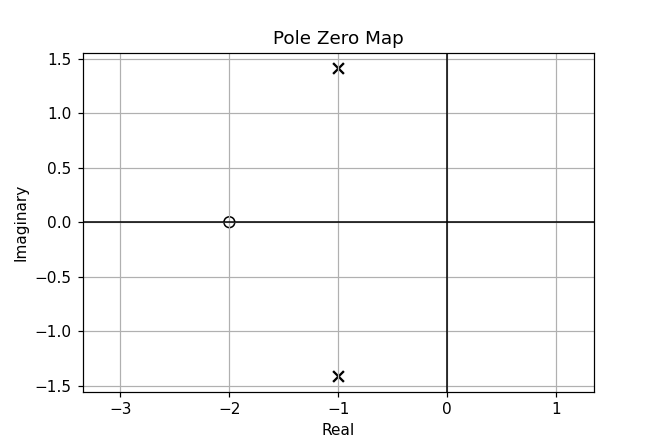

<IPython.core.display.Javascript object>


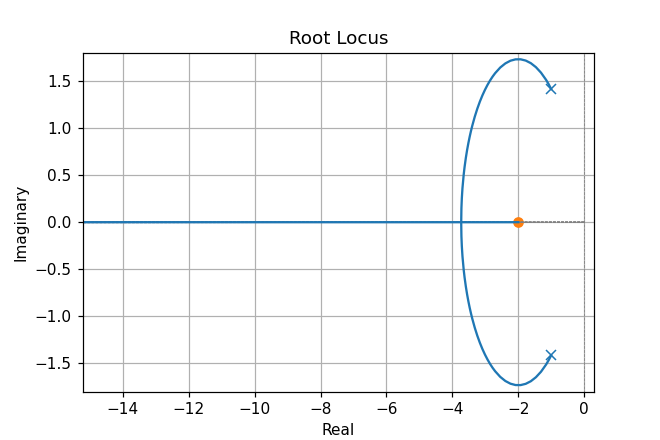

In [14]:
# pole-zero map
plt.figure(5,figsize = (6,4))
plt.grid(True)
co.pzmap(sys_ss)

# Root-locus
plt.figure(6,figsize = (6,4))
plt.grid(True)
co.root_locus(sys_ss);

### 2.4 Feedback Connection 

Python and MATLAB offer a function to create a feedback connection between 2 systems, for example, the plant and the controller. The feedback sign is **-1** by default and assumes negative feedback unless otherwise specified as a parameter to the function call. The syntax is 

> sys_fb = feedback(sys1,sys2, sign = -1) - sign parameter is optional. it is -1 by default

see example below for an unstable system stabilized through feedback

<IPython.core.display.Javascript object>


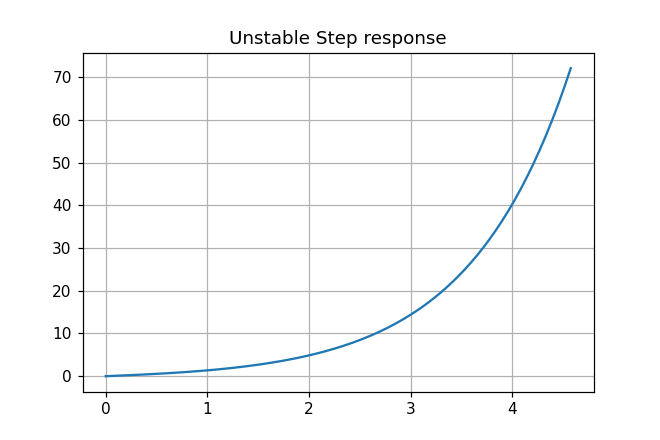

In [63]:
# Creating and plotting step response of an unstable system

sys_unstable = co.tf(np.array([1,2]),np.array([1,2,-3]))
t_unst,y_unst = co.step_response(sys_unstable)

plt.figure(7,figsize = (6,4))
plt.grid(True)
plt.title("Unstable Step response")
plt.plot(t_unst,y_unst)

<IPython.core.display.Javascript object>


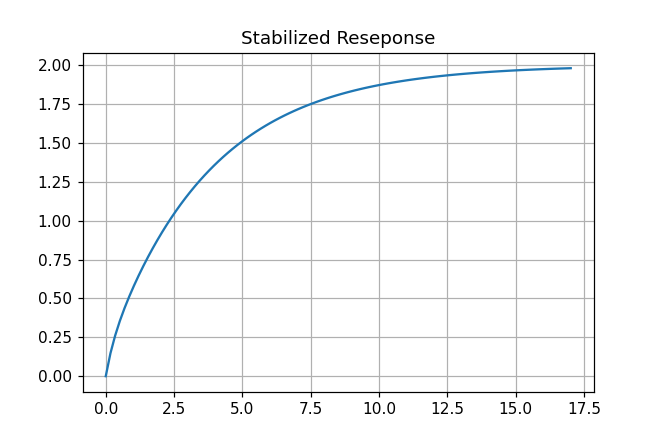

Text(0.5, 1.0, 'Stabilized Reseponse')

In [62]:
# Creating a simple feedback controller C = 2 to stabilize system and connecting the plant and controller using feedback

controller = co.tf(np.array([2]),np.array([1]))
sys_st = co.feedback(sys_unstable,controller)

t_st,y_st = co.step_response(sys_st) #Step Response

plt.figure(8,figsize = (6,4))
plt.grid(True)
plt.plot(t_st,y_st)
plt.title("Stabilized Reseponse")

### 2.5 Generating Lyapunov Matrices

The lyapunov stability theory is one of the most important theories to design and analyse control systems. It is used for Linear systems and heavily in the analysis and algorithm design for non-linear systems. Analogous to MATLAB, python has a function that solves the lyapunov equation 

$$ A^T P + PA^T = -Q $$

The syntax, similar to MATLAB, is 
> Q = lyap(A,P)

See example below

In [68]:
P = np.eye(2) # Generating 2x2 identity matrix

Q = co.lyap(A,P) # Solving Lyap equation
print('Q = \n', Q)

Q = 
 [[ 0.66666667 -0.5       ]
 [-0.5         1.        ]]


### 2.6 Controllability and Observability Matrix 

The controllability/observability matrix can be computed easily with a single command to check the rank of the output matrix and determine whether the system is controllable/observable. The syntax follows 

> ctrb = ctrb(A,B) - returns the controllability matrix  
> obsv = obsv(A,B) - returns the observability matrix

The rank of the matrices can be checked using the numpy function numpy.linalg.matrix_rank() which is similar to the rank() function in MATLAB.

In [82]:
# Controllability Matrix
ctrb = co.ctrb(A,B)
print('Controllability Matrix = \n', ctrb)
print('Controllability Matrix Rank = ', np.linalg.matrix_rank(ctrb))
# np.linalg.matrix_rank(co.ctrb(A,B)) # using a single line

obsv = co.obsv(A,C)
print('\nObservability Matrix = \n', obsv)
print('Observability Matrix Rank = ', np.linalg.matrix_rank(obsv)) 
# np.linalg.matrix_rank(co.obsv(A,C)) # using a single line

Controllability Matrix = 
 [[ 0.  1.]
 [ 1. -2.]]
Controllability Matrix Rank =  2

Observability Matrix = 
 [[ 2.  1.]
 [-3.  0.]]
Observability Matrix Rank =  2


## 3 - Further Reading and Resources

Further function references can be found at the [link]( https://python-control.readthedocs.io/en/0.8.4/) (Function references) mentioned above. Some notable functions are **minreal(), lqr(), place(), tfdata()** to name a few. 

Using Jupyter notebook helps integrating text and code in a same file that allows easy reading while preserving continuity of your typeset assignments. Jupyter notebook uses **Markdown** for the text cells and an easy-to-follow [Markdown Guide](https://www.markdownguide.org/basic-syntax/) is available online. 

For equations, Markdown uses LaTeX syntax which is recognized in jupyter notebook and is available at this [Link](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/).